<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n250.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,66.537972,-61.432059,15.105912,72.265464,-57.159552
1,0.0,1.0,67.530928,-4.791526,72.739402,73.163679,-0.424276
2,0.0,2.0,31.521425,-21.374994,20.146431,40.589985,-20.443554
3,0.0,3.0,81.313811,62.524655,153.838467,85.631482,68.206984
4,0.0,4.0,24.825785,-15.515388,19.310397,34.533203,-15.222805
...,...,...,...,...,...,...,...
19995,999.0,15.0,80.893969,32.505762,123.399731,86.491575,36.908155
19996,999.0,16.0,25.554668,-33.865166,1.689502,-8.426750,10.116252
19997,999.0,17.0,36.475511,-17.685043,28.790468,10.304751,18.485717
19998,999.0,18.0,88.018747,-86.808008,11.210739,98.712040,-87.501301


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,66.537972,-61.432059,15.105912,72.265464,-57.159552
1,0.0,1.0,67.530928,-4.791526,72.739402,73.163679,-0.424276
2,0.0,2.0,31.521425,-21.374994,20.146431,40.589985,-20.443554
3,0.0,3.0,81.313811,62.524655,153.838467,85.631482,68.206984
4,0.0,4.0,24.825785,-15.515388,19.310397,34.533203,-15.222805
...,...,...,...,...,...,...,...
19995,999.0,15.0,80.893969,32.505762,123.399731,86.491575,36.908155
19996,999.0,16.0,25.554668,-33.865166,1.689502,-8.426750,10.116252
19997,999.0,17.0,36.475511,-17.685043,28.790468,10.304751,18.485717
19998,999.0,18.0,88.018747,-86.808008,11.210739,98.712040,-87.501301


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    66.537972 -61.432059   15.105912  72.265464 -57.159552
      1.0    67.530928  -4.791526   72.739402  73.163679  -0.424276
      2.0    31.521425 -21.374994   20.146431  40.589985 -20.443554
      3.0    81.313811  62.524655  153.838467  85.631482  68.206984
      4.0    24.825785 -15.515388   19.310397  34.533203 -15.222805
...                ...        ...         ...        ...        ...
999.0 15.0   80.893969  32.505762  123.399731  86.491575  36.908155
      16.0   25.554668 -33.865166    1.689502  -8.426750  10.116252
      17.0   36.475511 -17.685043   28.790468  10.304751  18.485717
      18.0   88.018747 -86.808008   11.210739  98.712040 -87.501301
      19.0   53.480598  30.087366   93.567964  39.471985  54.095979

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    66.537972 -61.432059   15.105912  72.265464 -57.159552
      1.0    67.530928  -4.791526   72.739402  73.163679  -0.424276
      2.0    31.521425 -21.374994   20.146431  40.589985 -20.443554
      3.0    81.313811  62.524655  153.838467  85.631482  68.206984
      4.0    24.825785 -15.515388   19.310397  34.533203 -15.222805
...                ...        ...         ...        ...        ...
999.0 15.0   80.893969  32.505762  123.399731  86.491575  36.908155
      16.0   25.554668 -33.865166    1.689502  -8.426750  10.116252
      17.0   36.475511 -17.685043   28.790468  10.304751  18.485717
      18.0   88.018747 -86.808008   11.210739  98.712040 -87.501301
      19.0   53.480598  30.087366   93.567964  39.471985  54.095979

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,66.537972,-61.432059,15.105912,72.265464,-57.159552
1,0.0,1.0,67.530928,-4.791526,72.739402,73.163679,-0.424276
2,0.0,2.0,31.521425,-21.374994,20.146431,40.589985,-20.443554
3,0.0,3.0,81.313811,62.524655,153.838467,85.631482,68.206984
4,0.0,4.0,24.825785,-15.515388,19.310397,34.533203,-15.222805
...,...,...,...,...,...,...,...
19995,999.0,15.0,80.893969,32.505762,123.399731,86.491575,36.908155
19996,999.0,16.0,25.554668,-33.865166,1.689502,-8.426750,10.116252
19997,999.0,17.0,36.475511,-17.685043,28.790468,10.304751,18.485717
19998,999.0,18.0,88.018747,-86.808008,11.210739,98.712040,-87.501301


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y      y_hat      e_hat
rep   index                                                        
0.0   0.0    66.537972 -61.432059   15.105912  72.265464 -57.159552
      1.0    67.530928  -4.791526   72.739402  73.163679  -0.424276
      2.0    31.521425 -21.374994   20.146431  40.589985 -20.443554
      3.0    81.313811  62.524655  153.838467  85.631482  68.206984
      4.0    24.825785 -15.515388   19.310397  34.533203 -15.222805
...                ...        ...         ...        ...        ...
999.0 15.0   80.893969  32.505762  123.399731  86.491575  36.908155
      16.0   25.554668 -33.865166    1.689502  -8.426750  10.116252
      17.0   36.475511 -17.685043   28.790468  10.304751  18.485717
      18.0   88.018747 -86.808008   11.210739  98.712040 -87.501301
      19.0   53.480598  30.087366   93.567964  39.471985  54.095979

[20000 rows x 5 columns]

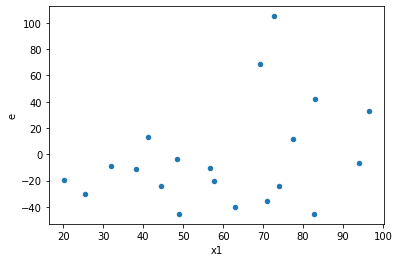

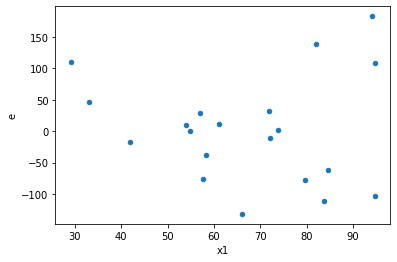

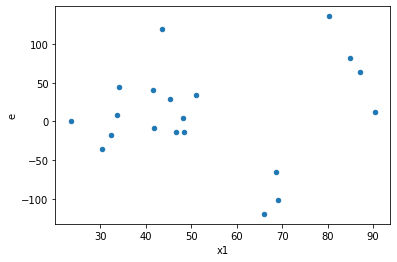

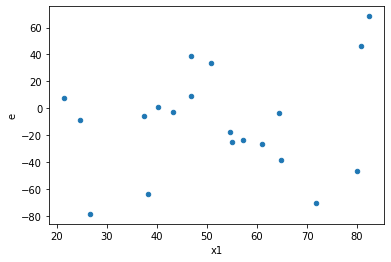

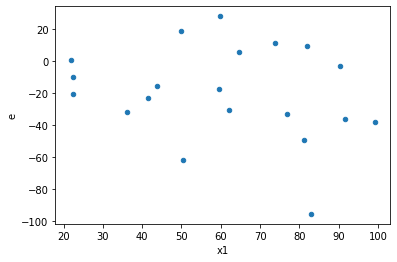

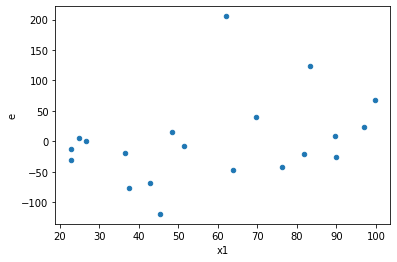

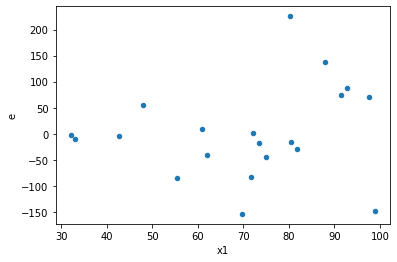

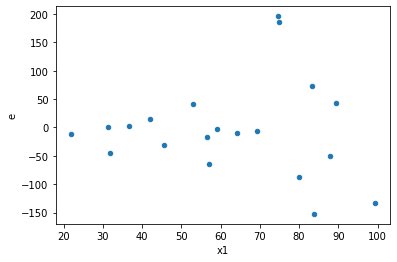

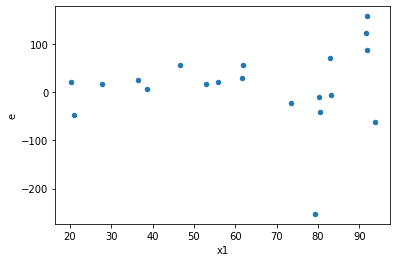

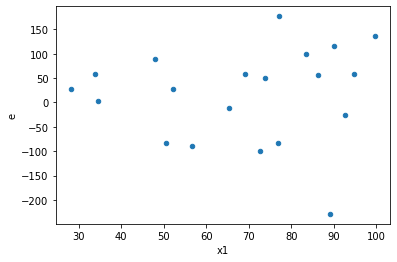

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,7.0,11785.970408849766,78648.30755362775,1683.7100584071093,11235.472507661107,6.673044715484171,0.022816732644147963,0.988591633677926,0.011408366322073982,Reject005=0 : Heteroscedasticity
1.0,7.0,7.0,6462.997210137526,36740.58586358527,923.2853157339323,5248.655123369324,5.68475966629784,0.03546317357966622,0.9822684132101669,0.01773158678983311,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,1858.206137371629,89961.62829111789,265.45801962451844,12851.661184445413,48.41315851984303,4.2216085895940836e-05,0.999978891957052,2.1108042947970418e-05,Reject005=0 : Heteroscedasticity
5.0,7.0,7.0,10655.607670550036,52223.774308504006,1522.2296672214338,7460.539186929143,4.90106016692413,0.052530516018402196,0.9737347419907989,0.026265258009201098,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,12230.527855312237,21608.807530182712,1747.2182650446052,3086.972504311816,1.766792716211107,0.47031180265759365,0.7648440986712032,0.23515590132879682,Reject005=1 : Homoscedasticity
7.0,7.0,7.0,14918.148549657559,54568.39941374493,2131.1640785225086,7795.48563053499,3.6578533342864135,0.10860160745325231,0.9456991962733738,0.05430080372662616,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,3999.1695154287945,35320.273055467405,571.309930775542,5045.7532936382,8.831901953443534,0.01017995670896954,0.9949100216455152,0.00508997835448477,Reject005=0 : Heteroscedasticity
9.0,7.0,7.0,11745.51241397225,19620.88277801414,1677.9303448531787,2802.98325400202,1.6705003652861914,0.5146243210564387,0.7426878394717806,0.25731216052821937,Reject005=1 : Homoscedasticity
10.0,7.0,7.0,2214.261400874411,17121.121028615868,316.323057267773,2445.8744326594096,7.732204075749477,0.015008130763032757,0.9924959346184836,0.007504065381516378,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,11785.970408849766,78648.30755362775,1683.7100584071093,11235.472507661107,6.673044715484171,0.022816732644147963,Reject005=0 : Heteroscedasticity
1.0,7.0,7.0,6462.997210137526,36740.58586358527,923.2853157339323,5248.655123369324,5.68475966629784,0.03546317357966622,Reject005=0 : Heteroscedasticity
2.0,7.0,7.0,23002.587808742443,21196.861026611896,3286.0839726774916,3028.1230038016993,0.9214989723267459,0.9168884714027982,Reject005=1 : Homoscedasticity
3.0,7.0,7.0,1858.206137371629,89961.62829111789,265.45801962451844,12851.661184445413,48.41315851984303,4.2216085895940836e-05,Reject005=0 : Heteroscedasticity
4.0,7.0,7.0,32261.93913980198,9319.638682739824,4608.84844854314,1331.3769546771177,0.28887410153353316,0.1235398706265455,Reject005=1 : Homoscedasticity
5.0,7.0,7.0,10655.607670550036,52223.774308504006,1522.2296672214338,7460.539186929143,4.90106016692413,0.052530516018402196,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,12230.527855312237,21608.807530182712,1747.2182650446052,3086.972504311816,1.766792716211107,0.47031180265759365,Reject005=1 : Homoscedasticity
7.0,7.0,7.0,14918.148549657559,54568.39941374493,2131.1640785225086,7795.48563053499,3.6578533342864135,0.10860160745325231,Reject005=1 : Homoscedasticity
8.0,7.0,7.0,3999.1695154287945,35320.273055467405,571.309930775542,5045.7532936382,8.831901953443534,0.01017995670896954,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    511
Reject005=1 : Homoscedasticity      489
Name: Result_test, dtype: int64